**Imports**

----

***Best loss = 0.60***

Activation function was ReLU

epoch=250

In [1]:
from tqdm import *
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import transforms, datasets
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
from torch import optim
# cudnn.benchmark = True

**Load data**

----

In [3]:
batch_size=1000
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
trainloader = torch.utils.data.DataLoader(
        datasets.CIFAR10(root='./data', train=True, transform=transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomCrop(32),
            transforms.CenterCrop(32),
            transforms.ToTensor(),
            normalize,
        ]), download=False),
        batch_size=batch_size, shuffle=True, pin_memory=True)
testloader = torch.utils.data.DataLoader(
        datasets.CIFAR10(root='./data', train=False, transform=transforms.Compose([
            transforms.ToTensor(),
            normalize,
        ])),
        batch_size=batch_size, shuffle=False, pin_memory=True)

**Create a model**

----

In [4]:
class Net(nn.Module):  
    def __init__(self):
        super(Net, self).__init__()
        
        self.feature_map_size = 4 * 4 * 256
        
        self.c1_layer = nn.Sequential( \
                                        nn.BatchNorm2d(3),
                                        nn.Conv2d(3,64,3,padding=1),
                                        nn.ReLU(),
                                        nn.Conv2d(64,64,3,padding=1),
                                        nn.MaxPool2d(2,stride=2),
                                        nn.ReLU(),
                                        nn.Dropout2d(0.25)
                                       )
        self.c2_layer = nn.Sequential( \
                                        nn.Conv2d(64,128,3,padding=1),
                                        nn.ReLU(),
                                        nn.Conv2d(128,128,3,padding=1),
                                        nn.MaxPool2d(2,stride=2),
                                        nn.ReLU(),
                                        nn.Dropout2d(0.25)
                                       )
        self.c3_layer = nn.Sequential( \
                                        nn.Conv2d(128,256,3,padding=1),
                                        nn.ReLU(),
                                        nn.Conv2d(256,256,3,padding=1),
                                        nn.ReLU(),
                                        nn.Conv2d(256,256,3,padding=1),
                                        nn.ReLU(),
                                        nn.Conv2d(256,256,3,padding=1),
                                        nn.MaxPool2d(2,stride=2),
                                        nn.ReLU(),
                                        nn.Dropout2d(0.25)
                                     )
                                      
        self.fc_layer = nn.Sequential( \
                                        nn.Linear(self.feature_map_size, 1024),
                                        nn.ReLU(),
                                        nn.Dropout2d(),
                                        nn.Linear(1024, 1024),
                                        nn.ReLU(),
                                        nn.Dropout2d(),
                                        nn.Linear(1024, 10)
                                    )

    def forward(self, x): 
        x = self.c1_layer(x)
        x = self.c2_layer(x)
        x = self.c3_layer(x)
        x = x.view(-1, self.feature_map_size)  
        x = self.fc_layer(x)
        return x

**Learn the model**

----

In [18]:
'''Combination of augmented data and raw data'''
def run(s_epoch,n_epoch,lr):
    net.train(True)
    optimizer = optim.Adam(net.parameters(), lr=lr)
#     for epoch in tqdm(range(s_epoch,n_epoch)):  
    for epoch in range(s_epoch,n_epoch):  
        running_corrects= 0
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.data[0]

            _, preds = torch.max(outputs.data, 1)
            running_corrects += torch.sum(preds == labels.data)
            
            
        print("Train accuracy %s and loss %s\n" %(running_corrects/len(trainloader.dataset),running_loss))
        loss_data.append(running_loss)
        corrects.append(running_corrects/len(trainloader.dataset))
    print('Finished Training')
    print("Train accuracy %s and loss %s\n" %(running_corrects/len(trainloader.dataset),running_loss))

In [19]:
net = Net().cuda()
criterion = nn.CrossEntropyLoss()
loss_data = []
corrects = []

In [20]:
%%time
run(0,40,0.001)

Train accuracy 0.18116 and loss 107.5786726474762

Train accuracy 0.31174 and loss 90.65355718135834

Train accuracy 0.40724 and loss 78.85357797145844

Train accuracy 0.49616 and loss 68.52150189876556

Train accuracy 0.55456 and loss 61.00254583358765

Train accuracy 0.59486 and loss 56.40764844417572

Train accuracy 0.6306 and loss 51.73451954126358

Train accuracy 0.65998 and loss 47.95654225349426

Train accuracy 0.68088 and loss 45.1919219493866

Train accuracy 0.70182 and loss 42.50929868221283

Train accuracy 0.71902 and loss 40.12581664323807

Train accuracy 0.7328 and loss 38.2113271355629

Train accuracy 0.75052 and loss 35.92939764261246

Train accuracy 0.76322 and loss 34.39856493473053

Train accuracy 0.7725 and loss 32.9351886510849

Train accuracy 0.77818 and loss 32.045094549655914

Train accuracy 0.7927 and loss 30.102792620658875

Train accuracy 0.79886 and loss 29.173475325107574

Train accuracy 0.80582 and loss 28.037240087985992

Train accuracy 0.8143 and loss 26.

In [21]:
%%time
run(40,100,0.001)

Train accuracy 0.88798 and loss 16.123976856470108

Train accuracy 0.89818 and loss 14.73160645365715

Train accuracy 0.9001 and loss 14.681829139590263

Train accuracy 0.90014 and loss 14.443586483597755

Train accuracy 0.90662 and loss 13.504648625850677

Train accuracy 0.90746 and loss 13.504818990826607

Train accuracy 0.9085 and loss 13.350712656974792

Train accuracy 0.9111 and loss 12.94841343164444

Train accuracy 0.9112 and loss 12.866643026471138

Train accuracy 0.91026 and loss 12.83768031001091

Train accuracy 0.91396 and loss 12.377125278115273

Train accuracy 0.91622 and loss 12.089767023921013

Train accuracy 0.91942 and loss 11.70405949652195

Train accuracy 0.92178 and loss 11.271068334579468

Train accuracy 0.92306 and loss 11.082750484347343

Train accuracy 0.92172 and loss 11.110503524541855

Train accuracy 0.92228 and loss 11.190772637724876

Train accuracy 0.9229 and loss 11.012647956609726

Train accuracy 0.92766 and loss 10.285326853394508

Train accuracy 0.9257

In [22]:
%%time
run(100,250,0.0001)

Train accuracy 0.9638 and loss 5.247608922421932

Train accuracy 0.9695 and loss 4.555219724774361

Train accuracy 0.97288 and loss 4.081075444817543

Train accuracy 0.97296 and loss 4.021172821521759

Train accuracy 0.9734 and loss 3.872068550437689

Train accuracy 0.97636 and loss 3.4375724121928215

Train accuracy 0.97742 and loss 3.354283470660448

Train accuracy 0.97726 and loss 3.395396877080202

Train accuracy 0.9761 and loss 3.4142263904213905

Train accuracy 0.97806 and loss 3.2414479926228523

Train accuracy 0.9778 and loss 3.2731963619589806

Train accuracy 0.97956 and loss 2.957782367244363

Train accuracy 0.97972 and loss 2.9968150556087494

Train accuracy 0.98074 and loss 2.7638172693550587

Train accuracy 0.98024 and loss 2.9096366316080093

Train accuracy 0.98166 and loss 2.753248555585742

Train accuracy 0.98056 and loss 2.8700411282479763

Train accuracy 0.98112 and loss 2.8425263799726963

Train accuracy 0.98164 and loss 2.764766402542591

Train accuracy 0.98116 and 

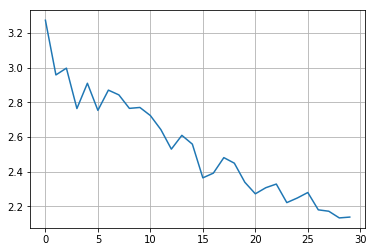

In [23]:
plt.plot(loss_data[-30:])
plt.grid()
plt.show()

**Eval the model**

----

In [24]:
net.train(False)

Net (
  (c1_layer): Sequential (
    (0): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True)
    (1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): ReLU ()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (5): ReLU ()
    (6): Dropout2d (p=0.25)
  )
  (c2_layer): Sequential (
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU ()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (4): ReLU ()
    (5): Dropout2d (p=0.25)
  )
  (c3_layer): Sequential (
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU ()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU ()
    (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU ()
    (

In [25]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

running_corrects=0
running_loss=0
y_hat = []
for data in testloader:
    images, labels = data
    images, labels = images.cuda(), labels.cuda()
    outputs = net(Variable(images, volatile=True))
    
    loss = criterion(outputs, Variable(labels, volatile=True))
    running_loss += loss.data[0]
    _, preds = torch.max(outputs.data, 1)
    running_corrects += torch.sum(preds == labels)
    
    y_hat.append(outputs)
        
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(1000):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1 
print ("test accuracy %s and loss %s\n" %(running_corrects/10000,running_loss))

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

test accuracy 0.8674 and loss 6.838100969791412

Accuracy of plane : 87 %
Accuracy of   car : 93 %
Accuracy of  bird : 81 %
Accuracy of   cat : 71 %
Accuracy of  deer : 87 %
Accuracy of   dog : 80 %
Accuracy of  frog : 91 %
Accuracy of horse : 90 %
Accuracy of  ship : 92 %
Accuracy of truck : 92 %


In [28]:
%%bash
rm *.csv
ls

3CNN_1fc_layer.ipynb
92perc_2cnn.pkl
92perc_3cnn.pkl
README.md
cnn_88perc_test.ipynb
data


In [29]:
import pandas
d = pandas.DataFrame()
d['id'] = range(10000)
res = y_hat
res = y_hat[0].data.cpu().numpy()
for i in range(1, 10):
    res = np.vstack((res, y_hat[i].cpu().data.numpy()))
        
for i in range(10):
    res = np.array(res, dtype=np.float128)
    d['c%s' % i] = np.exp(res[:, i])
d.to_csv('./ground1.csv', index=False)

**Save parametrs to pickle**

----

In [14]:
net_parametrs = net.state_dict()
with open('./92perc_3cnn.pkl','wb') as f:
    pickle.dump(net_parametrs,f)

In [15]:
with open('./92perc_3cnn.pkl','rb') as f:
    result_nets = pickle.load(f)
net.load_state_dict(result_nets)